In [2]:
# Data Exploration and Preprocessing
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/blogs.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe(include='all'))

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                    

In [3]:
print(df.isnull().sum())

Data      0
Labels    0
dtype: int64


In [4]:
print(df['Labels'].value_counts())

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


In [5]:
df['Text_length'] = df['Data'].apply(len)
print(df['Text_length'].describe())

count     2000.000000
mean      2324.978000
std       3590.560226
min        425.000000
25%       1147.000000
50%       1605.500000
75%       2374.500000
max      62290.000000
Name: Text_length, dtype: float64


In [11]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = ENGLISH_STOP_WORDS
import nltk
nltk.download('stopwords')
# Load the dataset
df = pd.read_csv('/content/blogs.csv')

# Handle missing values
print(df.isnull().sum())

# Drop rows with missing text or labels
df.dropna(subset=['Data', 'Labels'], inplace=True)

# Define a function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize and remove stopwords
    stop_words = set(ENGLISH_STOP_WORDS)  # Using sklearn stopwords as an alternative
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing
df['Cleaned_Text'] = df['Data'].apply(preprocess_text)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])

# Encoding labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Labels'])

# Print shapes of resulting matrices
print(X.shape)
print(len(y))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Data      0
Labels    0
dtype: int64
(2000, 17935)
2000


Feature Extraction:

Convert the cleaned text into numerical features using TF-IDF.

In [13]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the text data
X = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])

# Display the shape of the resulting matrix
print(X.shape)

(2000, 17935)


** Naive Bayes Model for Text Classification**

In [14]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from previous preprocessing steps
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 1600
Test set size: 400


**Implement a Naive Bayes Classifier**

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

**Evaluate the Model**

In [16]:
# Print accuracy score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.8350
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.90      0.82      0.86        22
comp.sys.ibm.pc.hardware       0.91      0.84      0.87        25
   comp.sys.mac.hardware       0.81      1.00      0.89        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       0.93      0.72      0.81        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.93      0.88      0.90        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.72      0.81      0.76        16
                 sci.med       0.94

**Sentiment Analysis**

Sentiment Distribution:
Sentiment
positive    1543
negative     457
Name: count, dtype: int64
Sentiment Distribution by Category:
Sentiment                 negative  positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.m

<ipython-input-17-449e91bad4c8>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


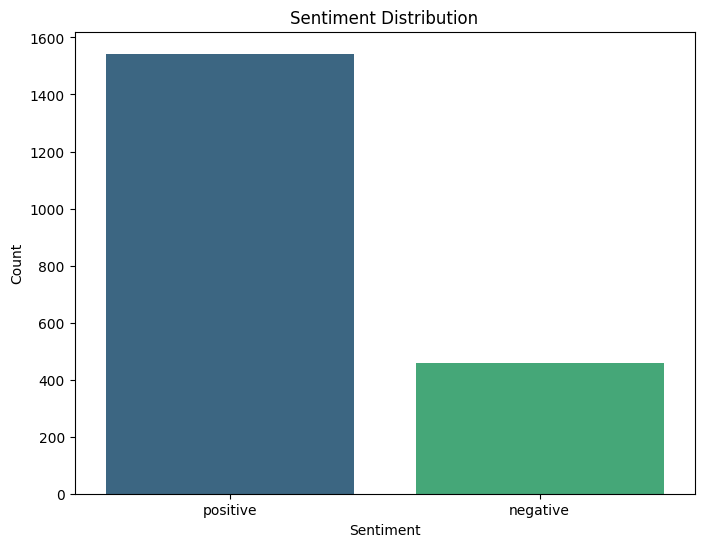

<Figure size 1200x800 with 0 Axes>

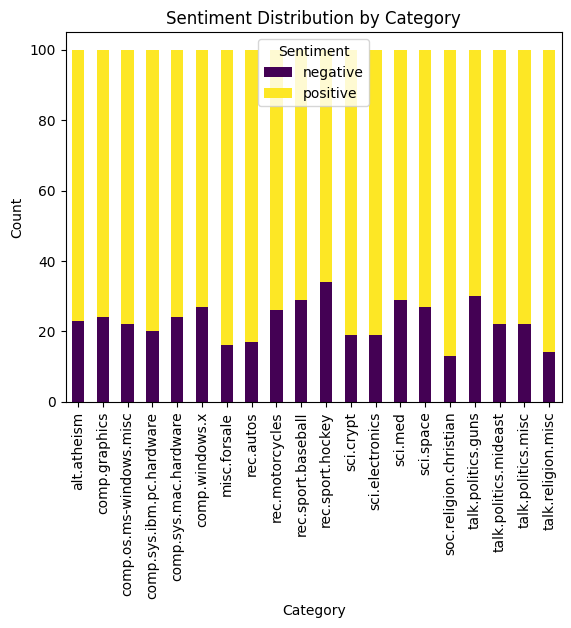

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


# Handle missing values
df.dropna(subset=['Data', 'Labels'], inplace=True)

# Define a function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()
print('Sentiment Distribution:')
print(sentiment_distribution)

# Sentiment distribution by category
sentiment_by_category = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print('Sentiment Distribution by Category:')
print(sentiment_by_category)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualize sentiment distribution by category
plt.figure(figsize=(12, 8))
sentiment_by_category.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

**Evaluation** and **Reflection** of sentiment analysis results

Accuracy: 0.8350
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.90      0.82      0.86        22
comp.sys.ibm.pc.hardware       0.91      0.84      0.87        25
   comp.sys.mac.hardware       0.81      1.00      0.89        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       0.93      0.72      0.81        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.93      0.88      0.90        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.72      0.81      0.76        16
                 sci.med       0.94

<ipython-input-18-c8129b9e80ef>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


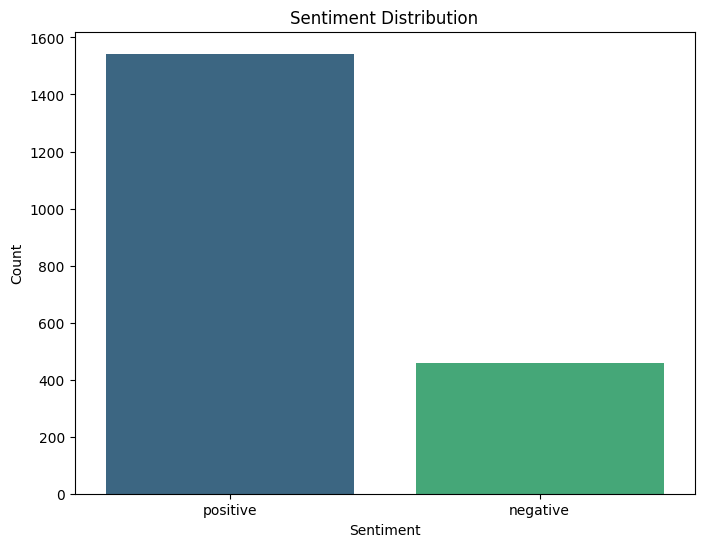

<Figure size 1200x800 with 0 Axes>

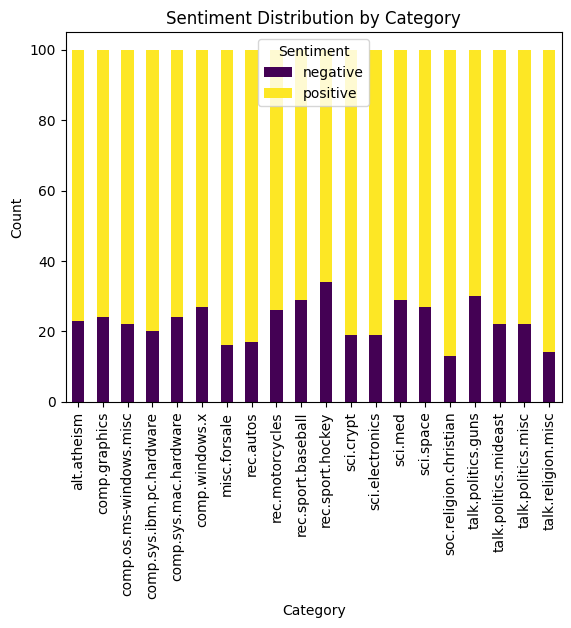

In [18]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

# Analyze Sentiment Distribution
sentiment_distribution = df['Sentiment'].value_counts()
print('Sentiment Distribution:')
print(sentiment_distribution)

# Sentiment distribution by category
sentiment_by_category = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print('Sentiment Distribution by Category:')
print(sentiment_by_category)

# Visualization of sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sentiment_by_category.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

**Performance of the model and any challenges encountered during the classification process.**

a. Accuracy:

Definition: Accuracy measures the proportion of correctly classified instances out of the total instances.
Interpretation: High accuracy indicates that the classifier is performing well overall. However, in cases of imbalanced datasets, accuracy alone may not be sufficient.
b. Precision:

Definition: Precision (also known as positive predictive value) measures the proportion of true positive predictions among all positive predictions made by the model.
Interpretation: High precision indicates that when the model predicts a class, it is likely to be correct. This is particularly important when the cost of false positives is high.
c. Recall:

Definition: Recall (also known as sensitivity) measures the proportion of true positive predictions among all actual positive instances.
Interpretation: High recall indicates that the model is good at identifying positive instances. This is crucial when the cost of missing positive instances is high.
d. F1-Score:

Definition: The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both concerns.
Interpretation: A high F1-score indicates a good balance between precision and recall. It is especially useful when dealing with imbalanced datasets.
Challenges Encountered:

Imbalanced Classes: If the dataset has imbalanced classes (e.g., some categories have very few samples), the model might perform well on majority classes but poorly on minority ones. Metrics like precision, recall, and F1-score help assess performance in such cases.
Feature Selection: The choice of features and preprocessing techniques (e.g., TF-IDF parameters) can impact model performance. Tuning these parameters might be necessary for optimal results.

** Summary of Sentiment Analysis**:


b. Implications of Sentiment Analysis:

Content Tone: The sentiment analysis results reflect the overall tone of the blog posts. If a particular category has a high proportion of negative sentiment, it might indicate issues or criticisms related to that category.

Audience Engagement: Understanding sentiment can provide insights into how the audience might perceive content. Positive sentiments could be associated with engaging or well-received content, while negative sentiments might indicate areas for improvement.

c. Challenges in Sentiment Analysis:

Subjectivity: Sentiment analysis, especially with simple methods like TextBlob, might not always capture nuanced sentiments or context. For more accurate sentiment classification, advanced models like transformers might be needed.
Domain-Specific Language: Blog posts might contain domain-specific jargon or slang that sentiment analysis tools might not handle well.